In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 42.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 73.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 17.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 88.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 46.9 MB/s eta 0:00:00

In [ ]:
! pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 52.0 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.37.0
    Uninstalling llvmlite-0.37.0:
      Successfully uninstalled llvmlite-0.37.0
  Attempting uninstall: numba
    Found existing installation: numba 0.54.1
    Uninstalling numba-0.54.1:
      Successfully uninstalled numba-0.54.1


In [ ]:
from pycaret.classification import *

In [ ]:
dataset = pd.read_csv('/content/indian_liver_patient.csv')
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
data = dataset.sample(frac=0.80,  random_state=101).reset_index(drop=True)
# creating the test dataset
data_unseen = dataset.drop(data.index).reset_index(drop=True)


print("Data Modelling :" + str(data.shape))
print("Unseen Data for Prediction "+ str(data_unseen.shape))

Data Modelling :(466, 11)
Unseen Data for Prediction (117, 11)


In [ ]:
exp_clf = setup(data=data, target='Dataset', session_id=125)

,Description,Value
0,session_id,125
1,Target,Dataset
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(466, 11)"
5,Missing Values,True
6,Numeric Features,9
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Dataset',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [ ]:
# exp_clf1 = setup(data=data, target='Dataset', pca=True, pca_components=0.95, session_id=123)

In [ ]:
# Comparing Model - which one is the best one
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.7301,0.5000,1.0000,0.7301,0.8440,0.0000,0.0000,0.012
lr,Logistic Regression,0.7297,0.7371,0.9065,0.7656,0.8296,0.1883,0.2104,0.532
ridge,Ridge Classifier,0.7241,0.0000,0.9833,0.7313,0.8387,0.0105,0.0228,0.011
lda,Linear Discriminant Analysis,0.7177,0.6998,0.9404,0.7409,0.8285,0.0749,0.1096,0.014
rf,Random Forest Classifier,0.7148,0.7435,0.8699,0.7741,0.8158,0.1759,0.1748,0.228
lightgbm,Light Gradient Boosting Machine,0.7146,0.7454,0.8446,0.7837,0.8107,0.2245,0.2322,0.108
et,Extra Trees Classifier,0.7145,0.7593,0.8661,0.7735,0.8143,0.1909,0.2038,0.182
knn,K Neighbors Classifier,0.7052,0.6600,0.8437,0.7763,0.8058,0.1850,0.1942,0.019
ada,Ada Boost Classifier,0.7027,0.7231,0.8277,0.7808,0.8004,0.2080,0.2210,0.096
gbc,Gradient Boosting Classifier,0.6932,0.7214,0.8569,0.7570,0.8021,0.1203,0.1320,0.096


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:DummyClassifier(constant=None, random_state=125, strategy='prior')
INFO:logs:compare_models() succesfully completed......................................


DummyClassifier(constant=None, random_state=125, strategy='prior')

In [ ]:
# create a model
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6970,0.7778,0.9167,0.7333,0.8148,0.0351,0.0430
1,0.8485,0.8472,1.0000,0.8276,0.9057,0.5378,0.6065
2,0.6061,0.7037,0.8333,0.6897,0.7547,-0.2017,-0.2274
3,0.7879,0.8241,0.9583,0.7931,0.8679,0.3529,0.3980
4,0.7576,0.7361,0.9583,0.7667,0.8519,0.2281,0.2797
5,0.7879,0.7546,0.9583,0.7931,0.8679,0.3529,0.3980
6,0.7188,0.7135,0.9167,0.7586,0.8302,0.0526,0.0619
7,0.8438,0.7865,0.9583,0.8519,0.9020,0.5238,0.5466
8,0.6562,0.6087,0.7826,0.7500,0.7660,0.1200,0.1204


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=125, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
# Tune a model
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6970,0.7731,0.9167,0.7333,0.8148,0.0351,0.0430
1,0.8485,0.8472,1.0000,0.8276,0.9057,0.5378,0.6065
2,0.6364,0.6991,0.8750,0.7000,0.7778,-0.1579,-0.1936
3,0.7879,0.8194,0.9583,0.7931,0.8679,0.3529,0.3980
4,0.7576,0.7454,0.9583,0.7667,0.8519,0.2281,0.2797
5,0.7879,0.7546,0.9583,0.7931,0.8679,0.3529,0.3980
6,0.7188,0.7135,0.9167,0.7586,0.8302,0.0526,0.0619
7,0.8438,0.7865,0.9583,0.8519,0.9020,0.5238,0.5466
8,0.6250,0.5942,0.7826,0.7200,0.7500,0.0052,0.0053


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LogisticRegression(C=0.662, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=125, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


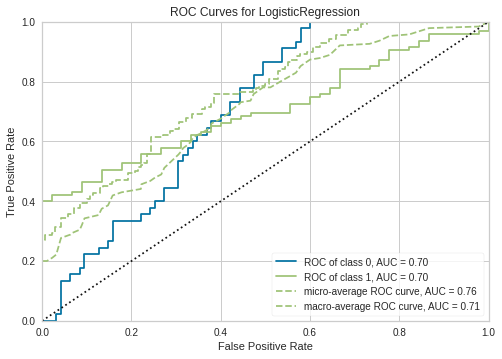

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
# plotting matrix
plot_model(tuned_lr, plot='auc')

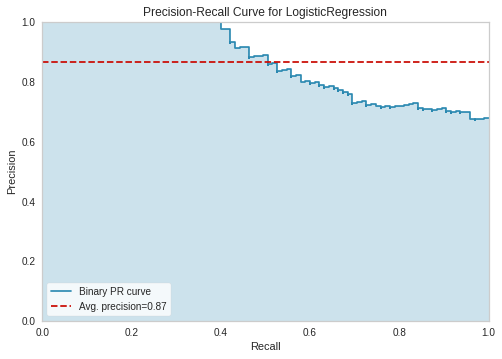

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
# plotting matrix
plot_model(tuned_lr, plot='pr')

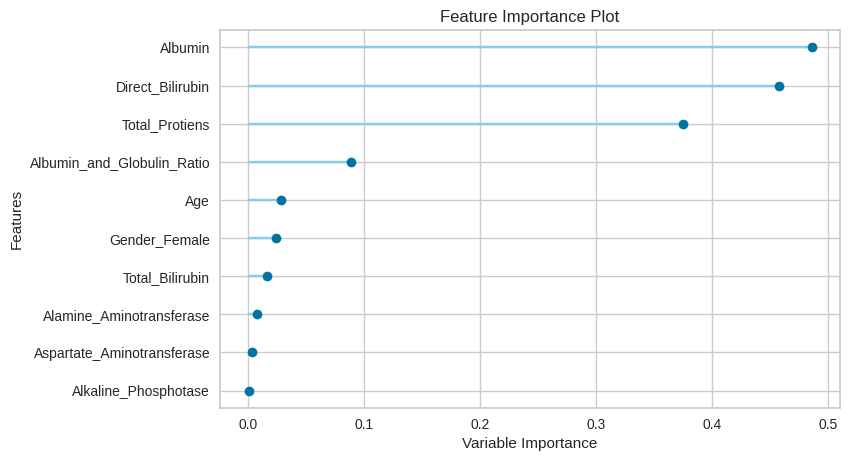

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
# Feature Importance plot
plot_model(tuned_lr, plot='feature')

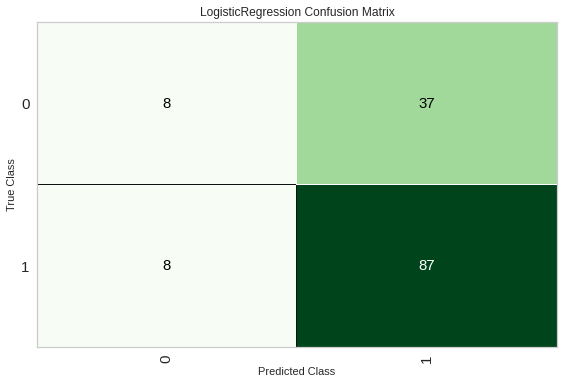

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lr, plot='confusion_matrix')

In [ ]:
#Evaluate
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=0.662, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=125, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(tuned_lr)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=0.662, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=125, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6786,0.7034,0.9158,0.7016,0.7945,0.1127,0.1373


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Dataset,Label,Score
0,18.0,0.8,0.2,199.0,34.0,31.0,6.5,3.5,1.16,1.0,0,0,0.5833
1,48.0,0.7,0.2,208.0,15.0,30.0,4.6,2.1,0.80,0.0,0,1,0.5814
2,38.0,1.8,0.8,342.0,168.0,441.0,7.6,4.4,1.30,0.0,1,1,0.9463
3,56.0,0.7,0.1,145.0,26.0,23.0,7.0,4.0,1.30,1.0,0,1,0.6341
4,57.0,4.5,2.3,315.0,120.0,105.0,7.0,4.0,1.30,0.0,1,1,0.9298
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,18.0,0.8,0.2,282.0,72.0,140.0,5.5,2.5,0.80,0.0,1,1,0.6049
136,46.0,14.2,7.8,374.0,38.0,77.0,4.3,2.0,0.80,1.0,1,1,0.9855
137,45.0,0.7,0.2,164.0,21.0,53.0,4.5,1.4,0.45,1.0,0,1,0.6778
138,42.0,0.8,0.2,168.0,25.0,18.0,6.2,3.1,1.00,1.0,1,1,0.5824


In [ ]:
# predict on test data set
unseen_prediction = predict_model(tuned_lr, data=data_unseen)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=0.662, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=125, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7521,0.847,0.9767,0.7568,0.8528,0.1425,0.2116


In [ ]:
save_model(tuned_lr, 'tuned_lr_model')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LogisticRegression(C=0.662, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=125, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model_name=tuned_lr_model, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Dataset',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                           

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Dataset',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=0.662, class_weight={}, dual=False,
                 